## Regularization(Ï†ïÏπôÌôî)
- Ïò§Î≤ÑÌîºÌåÖ(overfitting)ÏùÑ Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ï Ï§ëÏùò ÌïòÎÇòÏûÖÎãàÎã§. 
- L1, L2 Regularization, Dropout, Batch normalization Îì±Ïù¥ ÏûàÏäµÎãàÎã§. 
- regularization Í∏∞Î≤ïÎì§ÏùÄ Î™®Îç∏Ïóê Ï†úÏïΩ Ï°∞Í±¥ÏùÑ Í±∏Ïñ¥ÏÑú Î™®Îç∏Ïùò train lossÎ•º Ï¶ùÍ∞ÄÏãúÌÇ§Îäî Ïó≠Ìï†
-  train lossÎäî ÏïΩÍ∞Ñ Ï¶ùÍ∞ÄÌïòÏßÄÎßå Í≤∞Í≥ºÏ†ÅÏúºÎ°ú, validation lossÎÇò ÏµúÏ¢Ö test lossÎ•º Í∞êÏÜåÏãúÌÇ§Î†§Îäî Î™©Ï†Å

## Normalization(Ï†ïÍ∑úÌôî)
- Ïù¥Îäî Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉúÎ•º Ï¢Ä Îçî ÏùòÎØ∏ ÏûàÍ≤å, ÌòπÏùÄ Ìä∏Î†àÏù¥ÎãùÏóê Ï†ÅÌï©ÌïòÍ≤å Ï†ÑÏ≤òÎ¶¨ÌïòÎäî Í≥ºÏ†ï
- Îç∞Ïù¥ÌÑ∞Î•º z-scoreÎ°ú Î∞îÍæ∏Í±∞ÎÇò minmax scalerÎ•º ÏÇ¨Ïö©ÌïòÏó¨ 0Í≥º 1ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Î∂ÑÌè¨Î•º Ï°∞Ï†ïÌïòÎäî Í≤ÉÎì§Ïù¥ Ìï¥ÎãπÎê©ÎãàÎã§.
- normalizationÏùÄ Î™®Îì† ÌîºÏ≤ò Í∞íÏùò Î≤îÏúÑÎ•º ÎèôÏùºÌïòÍ≤å ÌïòÏó¨ Î™®Îç∏Ïù¥ ÌíÄÏñ¥Ïïº ÌïòÎäî Î¨∏Ï†úÎ•º Ï¢Ä Îçî Í∞ÑÎã®ÌïòÍ≤å Î∞îÍæ∏Ïñ¥ Ï£ºÎäî Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏûÖÎãàÎã§.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2Î°ú ÎêòÏñ¥ÏûàÎäî target Îç∞Ïù¥ÌÑ∞Î•º 
# ÏïåÏïÑÎ≥¥Í∏∞ ÏâΩÍ≤å 'setosa', 'versicolor', 'virginica'Î°ú Î∞îÍøâÎãàÎã§ 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(ÍΩÉÏûé Í∏∏Ïù¥)", X)
print("sepal length(ÍΩÉÎ∞õÏπ®Ïùò Í∏∏Ïù¥)", Y)

petal length(ÍΩÉÏûé Í∏∏Ïù¥) [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
sepal length(ÍΩÉÎ∞õÏπ®Ïùò Í∏∏Ïù¥) [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


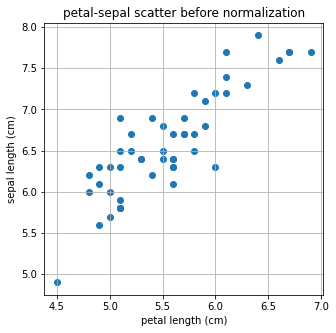

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

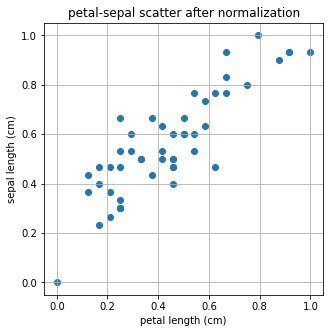

In [4]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris DatasetÏùÑ Linear RegressionÏúºÎ°ú ÌïôÏäµÌï©ÎãàÎã§. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear RegressionÏùò Í∏∞Ïö∏Í∏∞ÏôÄ Ï†àÌé∏ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§. 
a, b=linear.coef_, linear.intercept_
print("Í∏∞Ïö∏Í∏∞ : %0.2f, Ï†àÌé∏ : %0.2f" %(a,b))

Í∏∞Ïö∏Í∏∞ : 1.00, Ï†àÌé∏ : 1.06


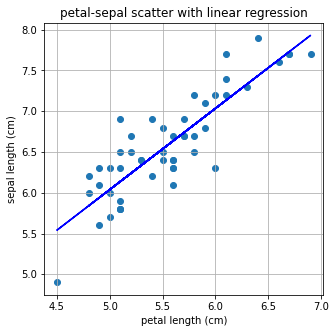

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

Í∏∞Ïö∏Í∏∞ : 0.37, Ï†àÌé∏ : 4.42


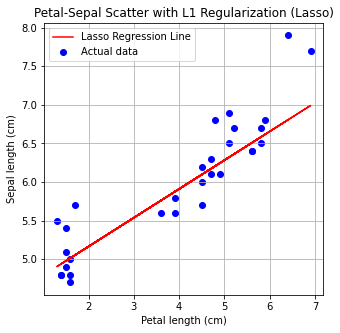

In [9]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï§ÄÎπÑ
data = load_iris()
X = data.data[:, 2].reshape(-1, 1)  # ÍΩÉÏûé Í∏∏Ïù¥ (petal length)
y = data.data[:, 0]  # ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥ (sepal length)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 Ï†ïÍ∑úÌôî (Lasso) Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌõàÎ†®
L1 = Lasso(alpha=0.1)  # alphaÎäî Ï†ïÍ∑úÌôî Í∞ïÎèÑ
L1.fit(X_train, y_train)

# Í∏∞Ïö∏Í∏∞ÏôÄ Ï†àÌé∏ Í∞ÄÏ†∏Ïò§Í∏∞
a, b = L1.coef_[0], L1.intercept_
print("Í∏∞Ïö∏Í∏∞ : %0.2f, Ï†àÌé∏ : %0.2f" % (a, b))

# ÏòàÏ∏°
y_pred = L1.predict(X_test)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='blue', label='Actual data')  # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞
plt.plot(X_test, y_pred, color='red', label='Lasso Regression Line')  # Lasso ÌöåÍ∑ÄÏÑ†
plt.title('Petal-Sepal Scatter with L1 Regularization (Lasso)') 
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.legend()
plt.grid()
plt.show()


Í∏∞Ïö∏Í∏∞ : 0.37, Ï†àÌé∏ : 4.42


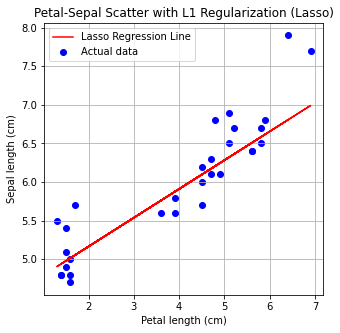

In [11]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï§ÄÎπÑ
data = load_iris()
X = data.data[:, 2].reshape(-1, 1)  # ÍΩÉÏûé Í∏∏Ïù¥ (petal length)
y = data.data[:, 0]  # ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥ (sepal length)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 Ï†ïÍ∑úÌôî (Lasso) Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌõàÎ†®
L2 = Ridge(alpha=0.1)  # alphaÎäî Ï†ïÍ∑úÌôî Í∞ïÎèÑ
L2.fit(X_train, y_train)

# Í∏∞Ïö∏Í∏∞ÏôÄ Ï†àÌé∏ Í∞ÄÏ†∏Ïò§Í∏∞
a, b = L1.coef_[0], L1.intercept_
print("Í∏∞Ïö∏Í∏∞ : %0.2f, Ï†àÌé∏ : %0.2f" % (a, b))

# ÏòàÏ∏°
y_pred = L1.predict(X_test)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='blue', label='Actual data')  # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞
plt.plot(X_test, y_pred, color='red', label='Lasso Regression Line')  # Lasso ÌöåÍ∑ÄÏÑ†
plt.title('Petal-Sepal Scatter with L1 Regularization (Lasso)') 
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.legend()
plt.grid()
plt.show()


### 5-3 L1 Regularization(Lasso) Ï†ïÏùò
$$
\hat{\beta}^{\text{lasso}} := \arg \min_{\beta} \left\{ \frac{1}{2N} \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{D} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{D} |\beta_j| \right\}
$$

$ \lambda \sum_{j=1}^{D} |\beta_j| $
- Ïù¥ Î∂ÄÎ∂ÑÏù¥ ÏóÜÎã§Î©¥ linear regressionÍ≥º ÎèôÏùºÌï©ÎãàÎã§.
>üí°Ï∞∏Í≥† ÏßÄÏãù (Lp norm) <br>
> normÏùÄ Î≤°ÌÑ∞ÎÇò ÌñâÎ†¨, Ìï®Ïàò Îì±Ïùò Í±∞Î¶¨Î•º ÎÇòÌÉÄÎÇ¥Îäî Í≤ÉÏúºÎ°ú Ïö∞Î¶¨Îäî Ïó¨Í∏∞ÏÑú Î≤°ÌÑ∞Í∞íÎßå Îã§Î£∞ ÏòàÏ†ïÏûÖÎãàÎã§. Lp norm Ïùò Ï†ïÏùòÎäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. (Ï∞∏Í≥†) Norm (mathematics)